In [1]:
import numpy as np
import pandas as pd

from lets_plot import *
from lets_plot.plot.coord import coord_polar


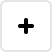
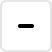
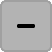
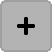
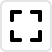
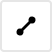
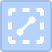
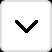
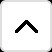
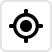
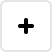
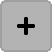
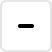
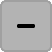
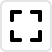
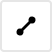
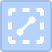
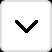
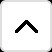
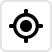

In [2]:
LetsPlot.setup_html()

##### Utils

In [3]:
def dump_plot(plot, display=False):
    import json

    try:
        import clipboard
    except:
        clipboard = None
        
    from lets_plot._type_utils import standardize_dict
    
    plot_dict = standardize_dict(plot.as_dict())
    plot_json = json.dumps(plot_dict, indent=2)
    
    if clipboard:
        clipboard.copy('')
        clipboard.copy(str(plot_json))
    else:
        if display is None:
            display = True

    return plot

## `coord_polar()` affects the coordinate grid

In [4]:
dump_plot(ggplot() + geom_point() + xlim(0, 3) + ggtitle('Plot grid') )

In [5]:
# xlim to make major grid lines symmetrical
dump_plot(ggplot() + geom_point() + coord_polar() + xlim(0, 3) + ggtitle('Plot grid') + theme_grey() )

## Stacked rects are transformed into a pie chart

In [6]:
p = ggplot() \
    + geom_rect(xmin=0, xmax=5, ymin=0, ymax=7, fill='red', size=0) \
    + geom_rect(xmin=0, xmax=5, ymin=7, ymax=11, fill='blue', size=0) \
    + geom_rect(xmin=0, xmax=5, ymin=11, ymax=14, fill='green', size=0) \

gggrid([
    p, 
    p + coord_polar(theta='y') + ggtitle('coord_polar(theta=y)'),
    p + coord_polar(theta='x') + ggtitle('coord_polar(theta=x)'),
])

## Dodged rects are transformed into something interesting

In [7]:
p = ggplot() \
    + geom_rect(xmin=0, xmax=1, ymin=0, ymax=7, fill='red', size=0) \
    + geom_rect(xmin=1, xmax=2, ymin=0, ymax=4, fill='blue', size=0) \
    + geom_rect(xmin=2, xmax=3, ymin=0, ymax=3, fill='green', size=0) \

gggrid([
    p, 
    p + coord_polar(theta='y') + ggtitle('coord_polar(theta=y)'),
    p + coord_polar(theta='x') + ggtitle('coord_polar(theta=x)'),
])

## `geom_bar()` works the same way as rects, adding tooltips

In [8]:
from lets_plot.mapping import as_discrete
bar_df = { 'foo': [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3] }
p = ggplot(bar_df) + geom_bar(aes(fill=as_discrete('foo', order=1)), size=0)

dump_plot(gggrid([
    p,
    p + coord_polar(theta='y') + ggtitle('position=stack, coord_polar(theta=y)'),
    p + coord_polar(theta='x') + ggtitle('position=stack, coord_polar(theta=x)'),
]))

In [9]:
p = ggplot(bar_df) + geom_bar(aes(fill=as_discrete('foo', order=1)), size=0, position='dodge')

dump_plot(gggrid([
    p,
    p + coord_polar(theta='y') + ggtitle('position=dodge, coord_polar(theta=y)'),
    p + coord_polar(theta='x') + ggtitle('position=dodge, coord_polar(theta=x)'),
]))

## Scatter plot just works

In [10]:
labels_df = {
    'x': [0, 1, 2, 3, 4, 5, 6, 7, 8],
    'y': [0, 45, 90, 135, 180, 225, 270, 315, 360],
    'r_y': [360, 315, 270, 225, 180, 135, 90, 45, 0],
    'l': ['0', '45', '90', '135', '180', '225', '270', '315', '360'],
    'g': ['1', '1', '1', '2', '2', '2', '3', '3', '3']
}

p = ggplot(labels_df, aes(x='x', y='y', label='l')) + geom_label() + xlab('') + ylab('')
gggrid([
    p,
    dump_plot(p + coord_polar(theta='y')),
    p + coord_polar(theta='x'),
])

## `geom_path()`
The transform resamples a path data by converting straight segments into curves. This behaviour is controlled by a `flat` parameter.

In [11]:
p = ggplot(labels_df, aes(x='x', y='y', color='y')) + scale_color_brewer(palette='GnBu')

dump_plot(gggrid([
    p + geom_path(size=3) + coord_polar() + ggtitle('coord_polar()'),
    p + geom_path(size=3, flat=True) + coord_polar(theta="x") + ggtitle('coord_polar(), flat=True'),
], ncol=2))

# Params

In [12]:
p = ggplot(labels_df, aes(x='x', y='y', color='y')) + scale_color_brewer(palette='GnBu') + theme(axis=element_blank())
gggrid([
    gggrid([
        p + geom_path(size=3, show_legend=False) + coord_polar() + ggtitle('coord_polar()'),
        p + geom_path(size=3, show_legend=False) + coord_polar(direction=-1) + ggtitle('coord_polar(direction=-1)'),
    ]),
    gggrid([
        p + geom_path(size=3, show_legend=False) + coord_polar(start=-3.14 / 2) + ggtitle('start=-PI/2'),
        p + geom_path(size=3, show_legend=False) + coord_polar(start=3.14 / 2) + ggtitle('start=PI/2'),
        p + geom_path(size=3, show_legend=False) + coord_polar(start=3.14 / 2, direction=-1) + ggtitle('start=PI/2, dir=-1'),
    ])
], ncol=1)

# Issues

### Expands break plots
Default expands break a plot - transform was built and normalized on extended domain, so the transform never returns the maximum angle because the input data never reaches the maximum value.

In [13]:
dump_plot(ggplot(labels_df, aes(x='x', y='y', label='l')) \
    + geom_label() \
    + coord_polar(theta="y") \
    + ggtitle('Incorrect angles with the default expand'))

### Yet no_expand also may break a plot
First lollipop overlaps with last lollipop.


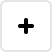
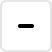
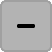
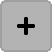
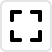
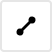
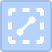
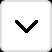
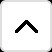
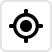
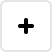
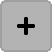
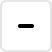
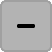
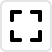
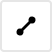
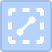
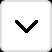
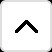
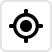

In [14]:
from lets_plot import *
LetsPlot.setup_html()
data = {
    'x': [1, 2, 3, 4, 5, 6, 7],
    'y': [2, 3, 5, 3, 1, 6, 4],
}
p = ggplot(data, aes('x', 'y')) + geom_lollipop()

gggrid([
    p,
    p + coord_polar()
])

# Regressions

Make sure that axis and grid alignment is still working in all cases:
- coord_flip
- title
- top/bottom/left/right
- marginal
- facet

In [15]:
p = ggplot(labels_df, aes(x='x', y='y', color='y')) + geom_path(size=3) + scale_color_brewer(palette='GnBu') + theme_light()
default = p + ggtitle('Default')
both = p + scale_x_continuous(position='both') + scale_y_continuous(position='both') + ggtitle('Both')
flip = p + coord_flip() + ggtitle('coord_flip()')
flip_both = p + scale_x_continuous(position='both') + scale_y_continuous(position='both') + coord_flip() + ggtitle('both + coord_flip()')
facet = p + facet_grid(x='g') + ggtitle('Facet')
facet_both = both + facet_grid(x='g') + ggtitle('Facet Both')
facet_flip = flip + facet_grid(x='g') + ggtitle('Facet Flip')
facet_flip_both = flip_both + facet_grid(x='g') + ggtitle('Facet Flip Both')

g = gggrid([
    default,
    both,
    flip,
    flip_both,
    facet, 
    facet_both,
    facet_flip,
    facet_flip_both
], ncol=2)

g

# Sandbox

In [16]:
from lets_plot.mapping import as_discrete
bar_df = { 'foo': [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3] }
p = ggplot(bar_df) + geom_bar(aes(fill=as_discrete('foo', order=1)), size=0)

dump_plot(
    gggrid([
    ggplot(bar_df) \
        + geom_bar(aes(fill=as_discrete('foo', order=1)), size=0) \
        + coord_polar(theta='y') \
        + ggtitle('position=stack, coord_polar(theta=y)'),
    
    ggplot(bar_df) \
        + geom_bar(aes(fill=as_discrete('foo', order=1)), size=0) \
        + coord_polar(theta='y') \
        + scale_x_continuous(expand=[0.00, 0]) + scale_y_continuous(expand=[0.0, 0]) \
        + ggtitle('position=stack, coord_polar(theta=y)'),
    
])
)

In [17]:
mpg = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv')
mpg

Unnamed: 0 manufacturer   model  displ  year  cyl       trans drv  cty  \
0             1         audi      a4    1.8  1999    4    auto(l5)   f   18   
1             2         audi      a4    1.8  1999    4  manual(m5)   f   21   
2             3         audi      a4    2.0  2008    4  manual(m6)   f   20   
3             4         audi      a4    2.0  2008    4    auto(av)   f   21   
4             5         audi      a4    2.8  1999    6    auto(l5)   f   16   
..          ...          ...     ...    ...   ...  ...         ...  ..  ...   
229         230   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   
230         231   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   
231         232   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   
232         233   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   
233         234   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   

     hwy fl    class  
0     29  p  compact  
1     29  p  compact  
2     31  p  compact  
3     30  p  compact  
4     26  p  compact  
..   ... ..      ...  
229   28  p  midsize  
230   29  p  midsize  
231   26  p  midsize  
232   26  p  midsize  
233   26  p  midsize  

[234 rows x 12 columns]

In [18]:
ggplot(mpg) + geom_bar(aes(x='model', y='cty', fill='cty'), stat='identity') + scale_fill_gradient(low='red', high='white', limits=(5,40)) + theme_void()

In [19]:
_ + coord_polar()

In [20]:
dump_plot(_)

In [21]:
labels_df = {
    'x': [0, 1, 2, 3, 4, 5, 6, 7, 8],
    'y': [0, 45, 90, 135, 180, 225, 270, 315, 360],
    'r_y': [360, 315, 270, 225, 180, 135, 90, 45, 0],
    'l': ['0', '45', '90', '135', '180', '225', '270', '315', '360'],
    'g': ['1', '1', '1', '2', '2', '2', '3', '3', '3']
}

p = ggplot(labels_df, aes(x='x', y='y', label='l')) + geom_point() + geom_text()
p + coord_polar(theta='x')

In [22]:
dump_plot(_)

# Axis and ticks

In [23]:
from IPython.display import SVG, Image, HTML

In [24]:
p = ggplot() \
    + geom_rect(xmin=-5, xmax=0, ymin=0, ymax=5, fill='red', size=0) \
    + geom_rect(xmin=-5, xmax=0, ymin=5, ymax=7.5, fill='green', size=0) \
    + theme_grey()
p

In [29]:
dump_plot(p + coord_polar(theta = "x"))

Expected (ggplot2):

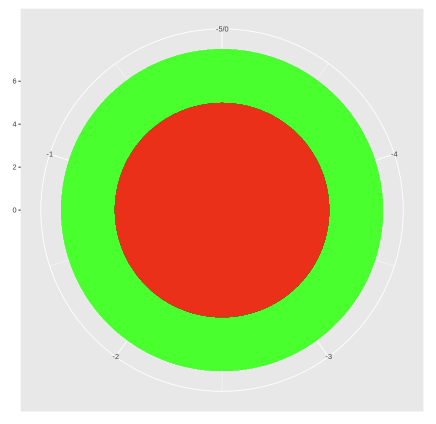

In [26]:
display(Image("lets-plot-images/coord_polar_ggplot_theta_x.png"))

In [27]:
p + coord_polar(theta = "y")

Expected (ggplot2):

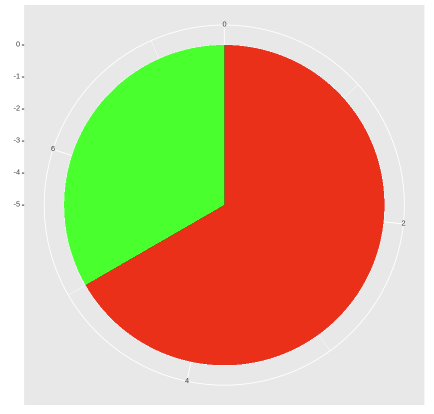

In [28]:
display(Image("lets-plot-images/coord_polar_ggplot_theta_y.png"))

#### Current issues:

theta='x'
1. Too many vertical ticks
2. Vertical ticks should be aligned to left
3. Outer horizontal axis line should not be added
4. Horizontal axis rendered over ticks
5. ~~Padding required for horizontal ticks to not overlap with vertical ticks~~

theta='y'
1. No vertical ticks
2. No padding for horintal ticks
3. Outer horizontal axis line should not be added